In [2]:
import pandas as pd

df = pd.read_csv('D:\\Escritorio\\311_Service_Requests_from_2010_to_Present.csv')

df


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [9]:
# Check shape of DataFrame
df.shape


(300698, 53)

In [10]:
# Question 2.) Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 
# and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation 
# and request closing. (Hint: Explore the package/module datetime)

# Solution 2

import datetime as dt
import time

# Convert "Closed Date" to datetime dtype
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Closed Date'].dtype

dtype('<M8[ns]')

In [11]:
# Convert "Created Date" to datetime dtype
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dtype

dtype('<M8[ns]')

In [12]:
df['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300693   2015-03-29 00:33:41
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 300698, dtype: datetime64[ns]

In [14]:
# Create new column Request_Closing_Time with time taken to close complain
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

df['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300693        NaT
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [19]:
# Question 3.: Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
# at least 4 major conclusions that you can come up with after generic data mining.

# Solution 3
# From here starting Insight
# Insight - 1 - Categorize Request_Closing_Time as follows -
# Below 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
# For this, first will create new column Request_Closing_In_Hr and then create new column - Request_Closing_Time_Category

# Function to convert TimeDelta in Hour
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    #print(days)
    #print(hours)
    return result
    #return round(pd.Timedelta(timeDel).seconds / 3600, 2)

In [23]:

test_days = df[df['Unique Key'] == 32122264]['Request_Closing_Time']
test_days


27704   6 days 01:05:00
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [22]:
# Testing of function with days
test_days = df[df['Unique Key'] == 32122264]['Request_Closing_Time']
print(toHr(test_days[27704]))
print(test_days[27704])
print(test_days.dtype)

6
None
6 days 01:05:00
timedelta64[ns]


In [188]:
# See columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
df.head

<bound method NDFrame.head of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name      

In [12]:
df.tail

<bound method NDFrame.tail of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name      

In [13]:
for i in df:
    print(i)



Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Region
School Code
School Phone Number
School Address
School City
School State
School Zip
School Not Found
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


In [97]:
columns = [i for i in df]
columns

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',


In [98]:
len(columns)

53

In [197]:
# We check data type of each column
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [15]:
len(df)

300698

In [191]:
# First we should check which column has how many missing values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [194]:
# As we seen Closed Date is important column and have many missing values
df['Closed Date'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
300693     True
300694    False
300695    False
300696    False
300697    False
Name: Closed Date, Length: 300698, dtype: bool

In [195]:
# As we seen Closed Date is important column and have many missing values
df[df['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# For our future exploration on Closed Date column we have noted down one row by its unique key column to check changes everytime we do something for Closed Date or related column
df[df['Unique Key'] == 32305700]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#complaint type has none missing value :P
ct = df['Complaint Type']

ct




0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
300693         Noise - Commercial
300694           Blocked Driveway
300695         Noise - Commercial
300696         Noise - Commercial
300697         Noise - Commercial
Name: Complaint Type, Length: 300698, dtype: object

In [29]:
ct = [i for i in ct]

ct
    

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Blocked Driveway',
 'Illegal Parking',
 'Illegal Parking',
 'Illegal Parking',
 'Illegal Parking',
 'Blocked Driveway',
 'Illegal Parking',
 'Blocked Driveway',
 'Blocked Driveway',
 'Blocked Driveway',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'Derelict Vehicle',
 'Blocked Driveway',
 'Blocked Driveway',
 'Noise - Commercial',
 'Noise - Commercial',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'Illegal Parking',
 'Noise - Commercial',
 'Illegal Parking',
 'Blocked Driveway',
 'Blocked Driveway',
 'Noise - House of Worship',
 'Blocked Driveway',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - Commercial',
 'Noise - Commercial',
 'Blocked Driveway',
 'Illegal Parking',
 'Blocked Driveway',
 'Illegal Parking',
 'Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Posting Advertisement',
 'Noise - Commercial',
 'Noise - Commercial',
 'Posting Advertisement',
 'Noise - Commercial',
 'Blocked Driveway',
 'No

In [30]:
len(ct)

300698

In [36]:
from collections import Counter

c = Counter()
c = Counter(ct)
c

Counter({'Noise - Street/Sidewalk': 48612,
         'Blocked Driveway': 77044,
         'Illegal Parking': 75361,
         'Derelict Vehicle': 17718,
         'Noise - Commercial': 35577,
         'Noise - House of Worship': 931,
         'Posting Advertisement': 650,
         'Noise - Vehicle': 17083,
         'Animal Abuse': 7778,
         'Vending': 3802,
         'Traffic': 4498,
         'Drinking': 1280,
         'Bike/Roller/Skate Chronic': 427,
         'Panhandling': 307,
         'Noise - Park': 4042,
         'Homeless Encampment': 4416,
         'Urinating in Public': 592,
         'Graffiti': 113,
         'Disorderly Youth': 286,
         'Illegal Fireworks': 168,
         'Ferry Complaint': 2,
         'Agency Issues': 6,
         'Squeegee': 4,
         'Animal in a Park': 1})

In [38]:
len(c)

24

In [40]:
c = Counter(ct).most_common(24)
c

[('Blocked Driveway', 77044),
 ('Illegal Parking', 75361),
 ('Noise - Street/Sidewalk', 48612),
 ('Noise - Commercial', 35577),
 ('Derelict Vehicle', 17718),
 ('Noise - Vehicle', 17083),
 ('Animal Abuse', 7778),
 ('Traffic', 4498),
 ('Homeless Encampment', 4416),
 ('Noise - Park', 4042),
 ('Vending', 3802),
 ('Drinking', 1280),
 ('Noise - House of Worship', 931),
 ('Posting Advertisement', 650),
 ('Urinating in Public', 592),
 ('Bike/Roller/Skate Chronic', 427),
 ('Panhandling', 307),
 ('Disorderly Youth', 286),
 ('Illegal Fireworks', 168),
 ('Graffiti', 113),
 ('Agency Issues', 6),
 ('Squeegee', 4),
 ('Ferry Complaint', 2),
 ('Animal in a Park', 1)]

In [49]:
for i in range(len(c)):
    for j in range(len(c[i])):
        print(c[i][j])

Blocked Driveway
77044
Illegal Parking
75361
Noise - Street/Sidewalk
48612
Noise - Commercial
35577
Derelict Vehicle
17718
Noise - Vehicle
17083
Animal Abuse
7778
Traffic
4498
Homeless Encampment
4416
Noise - Park
4042
Vending
3802
Drinking
1280
Noise - House of Worship
931
Posting Advertisement
650
Urinating in Public
592
Bike/Roller/Skate Chronic
427
Panhandling
307
Disorderly Youth
286
Illegal Fireworks
168
Graffiti
113
Agency Issues
6
Squeegee
4
Ferry Complaint
2
Animal in a Park
1


In [63]:
c_nombre = [c[i][0] for i in range(len(c))]
c_nombre


['Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Derelict Vehicle',
 'Noise - Vehicle',
 'Animal Abuse',
 'Traffic',
 'Homeless Encampment',
 'Noise - Park',
 'Vending',
 'Drinking',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Urinating in Public',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Graffiti',
 'Agency Issues',
 'Squeegee',
 'Ferry Complaint',
 'Animal in a Park']

In [64]:
c_data = [c[i][1] for i in range(len(c))]
c_data

[77044,
 75361,
 48612,
 35577,
 17718,
 17083,
 7778,
 4498,
 4416,
 4042,
 3802,
 1280,
 931,
 650,
 592,
 427,
 307,
 286,
 168,
 113,
 6,
 4,
 2,
 1]

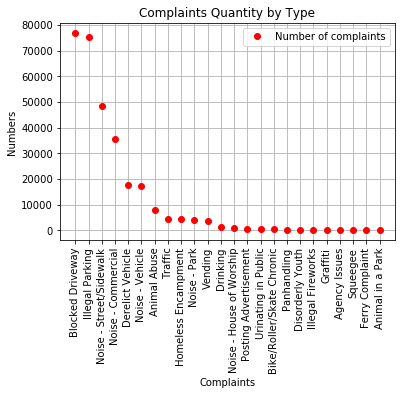

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline


x = c_nombre
y = c_data
plt.plot(x,y,'ro',label = 'Number of complaints')
plt.title('Complaints Quantity by Type')
plt.xlabel('Complaints')
plt.xticks(rotation=90)
plt.ylabel('Numbers')
plt.grid('True')
plt.legend(loc = 'best')
plt.show()


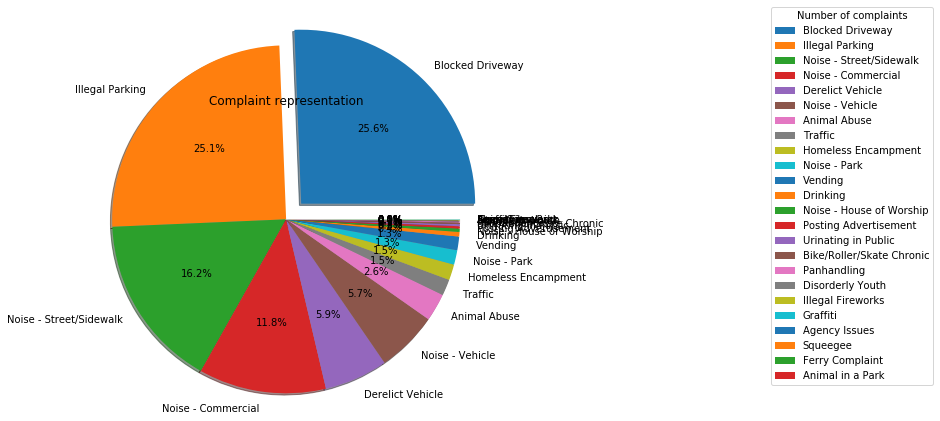

In [174]:
plt.pie(c_data, labels = c_nombre, autopct='%1.1f%%',shadow = 'True',radius = 2,explode = [0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title("Complaint representation")


plt.legend(c_nombre,
          title="Number of complaints",
          loc='best',
          bbox_to_anchor=(3, 1.5, 0.5, 0)
          )



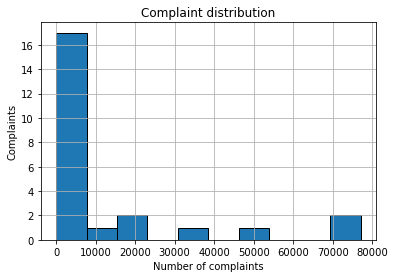

In [181]:
#we can see type of complaints agains number of complaints
import numpy as np
plt.hist(c_data, bins=10, edgecolor='black')
plt.title("Complaint distribution")
plt.xlabel("Number of complaints")
plt.ylabel("Complaints")
plt.grid('True')
plt.show()
